 # Homework 1
 
 This homework will explore some basic techniques presented in the first two weeks of the course.
 
 You will be invited to experiment with:
 
 1. Co-occurrences
 2. Naive Bayes classifier
 
 
 Fill in the blanks with your own code and see how it works.
 
 # 1. Co-occurrences

In [1]:
import nltk
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


### Vocabulary

Get the list of words of documents in the category `news`.

In [2]:
brown_news = brown.words(categories='news')

Extract the vocabulary and assign an index to each word.

In [3]:
news_vocab = set(brown_news) # this should be a set
news_word_ids = {word : ids for ids, word in enumerate(news_vocab)} # this should be a dictionary that assigns an index to each word
news_ids_word = {ids : word for word, ids in news_word_ids.items()}

## 1.1 Compute co-occurrence Matrix
Constructs a co-occurrence matrix for a certain window-size $n$ (with a default of
4), considering words $n$ before and $n$ after the word in the center of the window.

In [4]:
import numpy as np

def co_occurrence_matrix(words, word_ids, n=4):
    """
    :param words: a list of words
    :param word_ids: dictionary word -> id
    :param n: size of context
    :return: the matrix of cooccurrences
    """
    M = [[0]*len(word_ids) for i in range(len(word_ids))]
    for i in range(len(words)):
        for j in range(1, min( n + 1, len(words) - i)):
            M[word_ids[words[i]]][word_ids[words[i + j]]] += 1
            M[word_ids[words[i + j]]][word_ids[words[i]]] += 1
    return M

In [5]:
M = co_occurrence_matrix(brown_news, news_word_ids, 5)

### Explore co-occurences

In [6]:
def show_cooccurrences(word_list, word_ids, M):
    """
    :param word_list: the list of words whose co-occurrences to show
    :param word_ids: dictionary assigning ID's to words
    :param M: the co-occurrence matrix
    """
    # print the top 10 most co-occurring words for each word in word_list
    for w in word_list:
        if w in word_ids:
            res = np.array(M[word_ids[w]]).argsort()[-10:][::-1]
            print("Top 10 co-occurring words for", w ,":",[news_ids_word[res[i]] for i in range(10)])

In [7]:
word_list = ['python', 'snake', 'language', 'cobra', 'food', 'bread', 'wine', 'beer',
             'barrels', 'oil', 'energy', 'kuwait', 'revenues', 'profits']

In [8]:
show_cooccurrences(word_list, news_word_ids, M)

Top 10 co-occurring words for snake : ['and', 'braced', 'souvenir', 'restaurants', 'farms', ',', 'waiting', 'are', 'stands', 'Souphanouvong']
Top 10 co-occurring words for language : [',', ';', 'you', 'think', 'problems', 'biography', 'science', 'have', '.', 'pure']
Top 10 co-occurring words for food : [',', 'the', '.', 'of', 'a', 'and', '``', "''", 'Ramsey', 'they']
Top 10 co-occurring words for bread : ['vanilla', 'rich', 'ring', 'coconut', 'filling', 'with', 'and', 'a', ',', 'yeast']
Top 10 co-occurring words for beer : ['a', 'to', 'such', 'at', 'down', 'that', 'drop', 'on', 'the', 'Mexican']
Top 10 co-occurring words for oil : ['and', '?', '.', ',', 'The', 'by', 'supplies', 'mill', 'the', 'sir']
Top 10 co-occurring words for energy : ['was', 'Electric', 'not', 'after', 'any', 'Corp.', 'more', 'commission', 'it', 'the']
Top 10 co-occurring words for revenues : ['the', '.', 'in', ',', 'net', 'to', 'of', 'turnpikes', 'tax', 'a']
Top 10 co-occurring words for profits : ['the', 'an', 'd

### Do the same for category ‘hobbies’.

In [9]:
brown_hobbies = brown.words(categories='hobbies')
hobbies_vocab = set(brown_hobbies)
hobbies_word_ids = {word : ids for ids , word in enumerate(hobbies_vocab)}
M_hobbies = co_occurrence_matrix(brown_hobbies, hobbies_word_ids, 5)
show_cooccurrences(word_list, hobbies_word_ids, M_hobbies)

Top 10 co-occurring words for food : ['SEATO', 'Shaw', 'insult', 'zone', 'patrons', 'Soon', 'resent', 'Siciliana', 'surprises', "salesman's"]
Top 10 co-occurring words for bread : ['SEATO', 'third', '4911', 'rangy', 'Shaw', 'Cafe', 'Buster', 'attacked', '380-foot', 'Abner']
Top 10 co-occurring words for wine : ['patrons', '4911', 'accept', 'insult', 'vitality', 'Mont.', 'taxed', 'Controller', 'supervisors', 'Crump']
Top 10 co-occurring words for beer : ['plane', 'Shaw', 'rangy', 'scrimmaged', 'SEATO', 'receiving', 'Fruit', '4:18', 'Haaek', 'Sum']
Top 10 co-occurring words for barrels : ['Soon', 'hailed', 'patrons', 'movement', 'Speakers', 'Abner', 'Delaney', 'Each', 'Commenting', 'manufactured']
Top 10 co-occurring words for oil : ['zone', 'surprises', 'SEATO', '4911', 'plane', 'Shaw', 'insult', 'Siciliana', 'lie', 'Soon']
Top 10 co-occurring words for energy : ['zone', 'Airlines', 'insult', 'surprises', 'SEATO', 'actual', "court's", 'bases', 'statistical', 'Shaw']
Top 10 co-occurring 

## 1.2 Visualize the Vectors
Projects vectors into two dimensions and use it to plot the rows of the sliced matrix, using the technique of Principal
Component Analysis,

In [10]:
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def visualize_vectors(words, word_vectors):
    """
    Plot a 2 dimensional visualization of word vectors.
    :param words: the words to visualize
    :param word_vectors: the vectors for those words
    """
    vector_twodim = PCA().fit_transform(word_vectors)[:,:2]
    # show the numerical values of reduced vectors
    for w,v in zip(words, vector_twodim):
        print(w, v)

    plt.figure(figsize=(8,8))
    plt.scatter(vector_twodim[:,0], vector_twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, vector_twodim):
        plt.text(x+0.05, y+0.05, word)

Extract the co-occurrence vectors for a given list of words

In [11]:
def cooccurrence_vectors(word_list, word_ids, M):
    """
    :param word_list: a list of words
    :param word_ids: dictionary of word IDs
    :param M: co-occurrence matrix
    :return: tow results: the vectors for the given words as well as word_list 
    """
    vectors = []
    word_lists = []
    for w in word_list:
        if w in word_ids:
            vectors.append(M[word_ids[w]])
            word_lists.append(w)
    return vectors, word_lists

Visualize the co-occurrence vectors for the given words:

snake [-4.72888313  0.20498868]
language [-3.429634    1.02420987]
food [12.07988979  9.47018533]
bread [-4.63790258  0.28068521]
beer [-3.73269546 -0.66598421]
oil [-0.63045057  1.03234025]
energy [-4.64624827 -0.73390272]
revenues [12.81107684 -9.2223879 ]
profits [-3.08515261 -1.39013452]


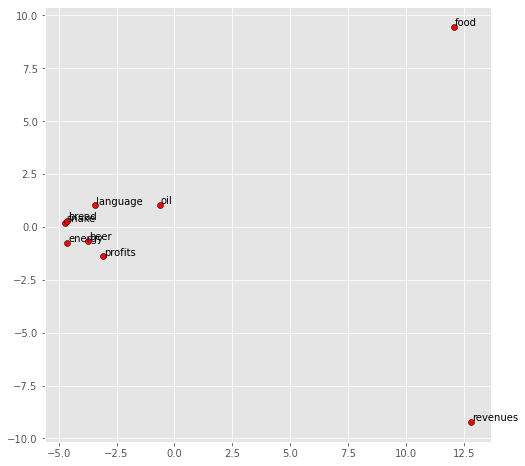

In [12]:
word_vectors, words = cooccurrence_vectors(word_list, news_word_ids, M)
visualize_vectors(words, word_vectors)

snake [0.36217126 9.80978913]
language [-5.22518491 -0.0387614 ]
food [-6.1441249  -1.74517237]
bread [-5.77150935 -1.09879051]
beer [-6.46643534 -1.63389655]
oil [30.48232641 -1.48952497]
energy [-1.0202157 -1.8527227]
revenues [-6.21702746 -1.95092063]


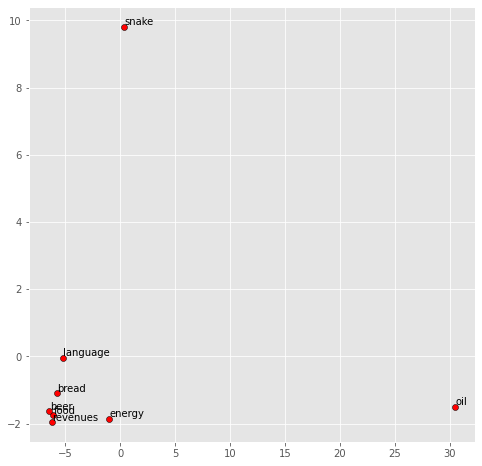

In [13]:
word_vectors, wordsw = cooccurrence_vectors(word_list, hobbies_word_ids, M_hobbies)
visualize_vectors(words, word_vectors)

# 2 Naïve Bayes Classifier
We will use the Movie Review dataset from https://www.kaggle.com/pankrzysiu/keras-imdb
It contains 50,000 highly polarized reviews, preprocessed, tokenized, indexed and stored into
numpy arrays.

In [14]:
num_words = 10000
MAX_NUM_WORDS = 10000

from keras.datasets import imdb

Load the training and test set:

In [15]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_NUM_WORDS,
                                                     index_from=1)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Each document is represented as a list of word IDs, while the output is {0,1} (negative or positive review)

In [16]:
x_train[1], y_train[1]

([1,
  192,
  1151,
  192,
  8253,
  76,
  226,
  3,
  4,
  1461,
  4367,
  5010,
  132,
  24,
  2,
  713,
  6,
  116,
  1632,
  12,
  392,
  18,
  11,
  117,
  952,
  187,
  100,
  3,
  205,
  108,
  3101,
  19,
  12,
  67,
  186,
  6,
  28,
  21,
  5,
  2,
  247,
  124,
  91,
  2,
  112,
  7,
  2298,
  1521,
  3,
  645,
  2,
  114,
  7,
  33,
  8161,
  2,
  227,
  7,
  338,
  1320,
  2,
  116,
  7,
  2,
  128,
  4899,
  17,
  2,
  1000,
  3,
  87,
  27,
  950,
  44,
  35,
  2,
  453,
  7,
  43,
  41,
  36,
  1541,
  1903,
  396,
  2,
  1647,
  24,
  6851,
  3,
  161,
  9,
  3213,
  2,
  2,
  1151,
  7,
  192,
  773,
  5,
  8253,
  2,
  347,
  2635,
  146,
  603,
  2,
  8001,
  13,
  121,
  123,
  66,
  2,
  6851,
  13,
  347,
  163,
  4360,
  96,
  3,
  2,
  226,
  7,
  41,
  2,
  1155,
  13,
  297,
  118,
  3,
  118,
  172,
  9,
  218,
  173,
  134,
  48,
  7,
  4371,
  226,
  8253,
  3,
  2,
  654,
  243,
  2348,
  3,
  2,
  9835,
  129,
  150,
  489,
  16,
  2,
  30,
  7462,
  121

## 2.1 Classifier

The classifier should be impelemted as a class with two methods: `train()` and `predict()`.

In [17]:
list(y_train).count(1),y_train.sum()

(12500, 12500)

In [18]:
import numpy as np
from collections import defaultdict

class NBayesClassifier():
    
    def train(self, x_train, y_train):
        """
        :param x_train: an array of list of word IDs
        :param y_train: {0,1} category for the correspoding document
        """
        # compute priors for each category
        self.P_C = [list(y_train).count(0)/len(y_train), list(y_train).count(1)/len(y_train)]
        # compute the conditional probabilities for each word/category pair
        w_cnt = {}
        for ids, d in enumerate(x_train):
            for w in d:
                if w not in w_cnt:
                    w_cnt[w] = [0, 0]
                w_cnt[w][y_train[ids]] += 1             
        co_cnt = np.sum(list(w_cnt.values()),axis=0)
        self.logprob = {w : np.log([(w_cnt[w][0] + 1)/(co_cnt[0] + len(w_cnt)), (w_cnt[w][1] + 1)/(co_cnt[1] + len(w_cnt))]) for w in w_cnt}
        # turn counts into logprob
        
    def predict(self, x_test):
        """
        :param x_test: a list of word IDs
        :return: the predicted class for :param x_test:.
        """
        y_pred = [0] * len(x_test)
        log_prior =  np.log(self.P_C)
        for ids, d in enumerate(x_test):
            y_pred[ids] = np.argmax(np.add(log_prior,np.sum([self.logprob[w] for w in d],axis=0)))

        return y_pred

In [19]:
nb_classifier = NBayesClassifier()
nb_classifier.train(x_train, y_train)

In [20]:
nb_classifier.predict(x_test)

[0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,


## 2.2 Evaluation

In [21]:
def evaluate(y_test, y_pred):
    # compute tp, fp, tn, fn
    tp = fp = tn = fn = 0
    for i in range(len(y_test)): 
        if y_test[i] == y_pred[i] == 1:
            tp += 1
        if y_pred[i] == 1 and y_test[i] != y_pred[i]:
            fp += 1
        if y_test[i] == y_pred[i]== 0:
            tn += 1
        if y_pred[i] == 0 and y_test[i] != y_pred[i]:
            fn += 1
    accuracy = (tp + tn) / (tp + fn + fp + tn)  
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 * precision * recall / (precision + recall)
    print('Accuracy: %.2f , Precision: %.2f , Recall: %.2f , F1: %.2f ' % (accuracy, precision, recall, F1))

In [22]:
y_pred = nb_classifier.predict(x_test)
evaluate(y_test, y_pred)

Accuracy: 0.82 , Precision: 0.85 , Recall: 0.77 , F1: 0.81 


Compare with an official metrics:

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     12500
           1       0.85      0.77      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000

